In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [87]:

file_path = "Final_Big_Analysis_box.txt"


df = pd.read_csv(file_path, delim_whitespace=True, header=None, index_col=None)


df

/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/3111641252.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, index_col=None)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,192,1,1,5,0.0010,0.0010,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,0.057745,0.006391,-0.026560
1,0,195,1,1,5,0.0010,0.0010,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,0.173451,0.006024,-0.067080
2,0,243,1,1,5,0.0010,0.0010,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,0.000082,-0.000046,-0.000003
3,0,245,1,1,5,0.0010,0.0010,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,-0.000314,0.000073,-0.000171
4,0,292,1,1,5,0.0010,0.0010,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,-0.000054,-0.000105,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411371,0,956376,1,1,5,0.0005,0.0005,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,0.000000,0.000000,-0.117249
411372,0,956424,1,1,5,0.0010,0.0010,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,-0.006353,-0.142296,-0.370995
411373,0,956448,1,1,5,0.0005,0.0005,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,-0.199074,-0.083866,-0.719992
411374,0,956471,1,1,5,0.0005,0.0005,23,FTBX5F2QZF,24,...,0,0,0,0,0,0,15,0.115690,0.057176,-0.166836


In [88]:
def rotate_xz_clockwise(x, y, z, angle_degrees=25):


    angle_radians = np.radians(angle_degrees)
    

    rotation_matrix = np.array([
        [ np.cos(angle_radians), 0, np.sin(angle_radians)],
        [ 0,                   1, 0                   ],
        [-np.sin(angle_radians), 0, np.cos(angle_radians)]
    ])
    

    coords = np.vstack((x, y, z))
    

    rotated_coords = rotation_matrix @ coords
    
    x_new, y_new, z_new = rotated_coords
    return x_new, y_new, z_new




In [89]:
new_df = pd.DataFrame(df.iloc[:, 1])  
new_df.columns = ["Object id"]  
new_df["Dia (m)"]=df.iloc[:, 5]*2000
new_df["x"]=df.iloc[:, 19]*1000
new_df["y"]=df.iloc[:, 20]*1000
new_df["z"]=df.iloc[:, 21]*1000
new_df["Vx"]=df.iloc[:, 37]
new_df["Vy"]=df.iloc[:, 38]
new_df["Vz"]=df.iloc[:, 39]

new_df

,Object id,Dia (m),x,y,z,Vx,Vy,Vz
0,192,2.0,61.4529,10.288400,-32.5134,0.057745,0.006391,-0.026560
1,195,2.0,335.1410,2.770710,-153.9060,0.173451,0.006024,-0.067080
2,243,2.0,-415.8060,-0.821557,187.8180,0.000082,-0.000046,-0.000003
3,245,2.0,-407.0930,12.307500,182.2080,-0.000314,0.000073,-0.000171
4,292,2.0,-408.6980,15.631600,184.4040,-0.000054,-0.000105,0.000062
...,...,...,...,...,...,...,...,...
411371,956376,1.0,-411.9450,1.926480,225.4310,0.000000,0.000000,-0.117249
411372,956424,2.0,-409.5200,-16.842000,222.9930,-0.006353,-0.142296,-0.370995
411373,956448,1.0,-402.2590,-4.662650,221.0030,-0.199074,-0.083866,-0.719992
411374,956471,1.0,-405.3730,-12.422100,220.8350,0.115690,0.057176,-0.166836


In [90]:
df=new_df

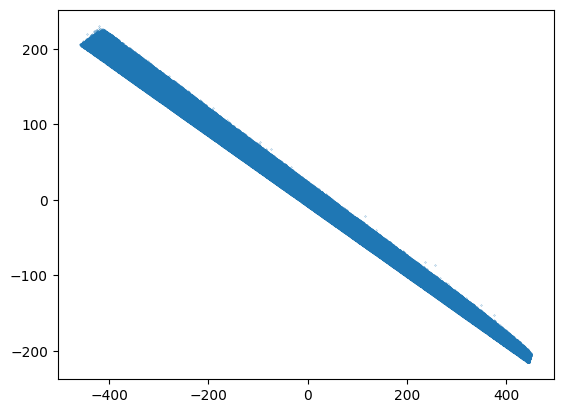

In [92]:
X = np.array(df['x'])
Y = np.array(df['y'])
Z = np.array(df['z'])
Vx = np.array(df['Vx'])
Vy = np.array(df['Vy'])
Vz = np.array(df['Vz'])

plt.plot(X,Z,'o', markersize=0.2)

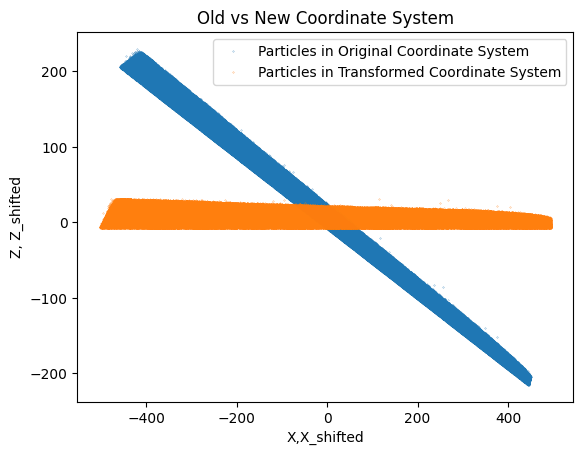

In [94]:
X_shift, Y_shift, Z_shift = rotate_xz_clockwise(X,Y,Z,-25)
Vx_shift, Vy_shift, Vz_shift = rotate_xz_clockwise(Vx,Vy,Vz, -25)

plt.plot(X,Z,'o', markersize=0.2, label='Particles in Original Coordinate System')
plt.plot(X_shift, Z_shift,'o', markersize=0.2, label='Particles in Transformed Coordinate System')
plt.legend()
plt.title('Old vs New Coordinate System')
plt.xlabel('X,X_shifted')
plt.ylabel('Z, Z_shifted')

plt.show()

In [95]:
df['x'] = (X_shift - X_shift.min())
df['y'] = (Y_shift - Y_shift.min())
df['z'] = (Z_shift - Z_shift.min())
df['Vx'] = Vx_shift
df['Vy'] = Vy_shift
df['Vz'] = Vz_shift


In [96]:
df

,Object id,Dia (m),x,y,z,Vx,Vy,Vz
0,192,2.0,571.501953,34.791700,3.722330,0.063559,0.006391,0.000332
1,195,2.0,870.850339,27.274010,9.368860,0.185549,0.006024,0.012508
2,243,2.0,45.842422,23.681743,1.712066,0.000076,-0.000046,0.000032
3,245,2.0,56.109970,36.810800,0.309953,-0.000212,0.000073,-0.000288
4,292,2.0,53.727277,40.134900,1.621902,-0.000076,-0.000105,0.000033
...,...,...,...,...,...,...,...,...
411371,956376,1.0,33.445736,26.429780,37.432750,0.049552,0.000000,-0.106264
411372,956424,2.0,36.673876,7.661300,36.248021,0.151031,-0.142296,-0.338921
411373,956448,1.0,44.095587,19.840650,37.513100,0.123859,-0.083866,-0.736667
411374,956471,1.0,41.344344,12.081200,36.044807,0.175359,0.057176,-0.102312


In [97]:
grid_size = 5
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()
z_min, z_max = df['z'].min(), df['z'].max()

x_bins = int((x_max - x_min) / grid_size) + 1
y_bins = int((y_max - y_min) / grid_size) + 1
z_bins = int((z_max - z_min) / grid_size) + 1

In [98]:
def num_den_pf(df, grid_size = grid_size):
 
    density_grid = np.zeros((x_bins, y_bins, z_bins))
    pf_grid = np.zeros((x_bins, y_bins, z_bins))

    for _, particle in df.iterrows():

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        

        density_grid[x_idx, y_idx, z_idx] += 1

        diameter = particle['Dia (m)']
        particle_volume = np.pi*(diameter**3)/6
    

        pf_grid[x_idx, y_idx, z_idx] += particle_volume

    grid_cell_volume = grid_size**3
    pf_grid = pf_grid/grid_cell_volume

    xy_den = density_grid.sum(axis=2)  # Sum along z-axis
    xz_den = density_grid.sum(axis=1)  # Sum along y-axis

    xy_pf = pf_grid.mean(axis=2)  # Average along z-axis
    xz_pf = pf_grid.mean(axis=1)  # Average along y-axis

    # Plot Number Density
    plt.figure(figsize=(10, 6))
    plt.suptitle('Number Density')

    # XY Projection
    plt.subplot(2, 1, 1)
    plt.imshow(xy_den.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Particle Density', ticks=np.linspace(0, xy_den.max(), 6))  # Add more ticks
    plt.title('XY Projection')
    plt.xlabel('X/d')
    plt.ylabel('Y/d')

    # XZ Projection
    plt.subplot(2, 1, 2)
    plt.imshow(xz_den.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, z_min, z_max])
    plt.colorbar(label='Particle Density', ticks=np.linspace(0, xz_den.max(), 6))  # Add more ticks
    plt.title('XZ Projection')
    plt.xlabel('X/d')
    plt.ylabel('Z/d')

    plt.tight_layout()  # Adjust spacing
    plt.show()

    # Plot Packing Fraction
    plt.figure(figsize=(10, 6))
    plt.suptitle('Total Packing Fraction')

    # XY Projection
    plt.subplot(2, 1, 1)
    plt.imshow(xy_pf.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Packing Fraction', ticks=np.linspace(0, xy_pf.max(), 6))  # Add more ticks
    plt.title('XY Projection')
    plt.xlabel('X/d')
    plt.ylabel('Y/d')

    # XZ Projection
    plt.subplot(2, 1, 2)
    plt.imshow(xz_pf.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, z_min, z_max])
    plt.colorbar(label='Packing Fraction', ticks=np.linspace(0, xz_pf.max(), 6))  # Add more ticks
    plt.title('XZ Projection')
    plt.xlabel('X/d')
    plt.ylabel('Z/d')

    plt.tight_layout()  # Adjust spacing
    plt.show()


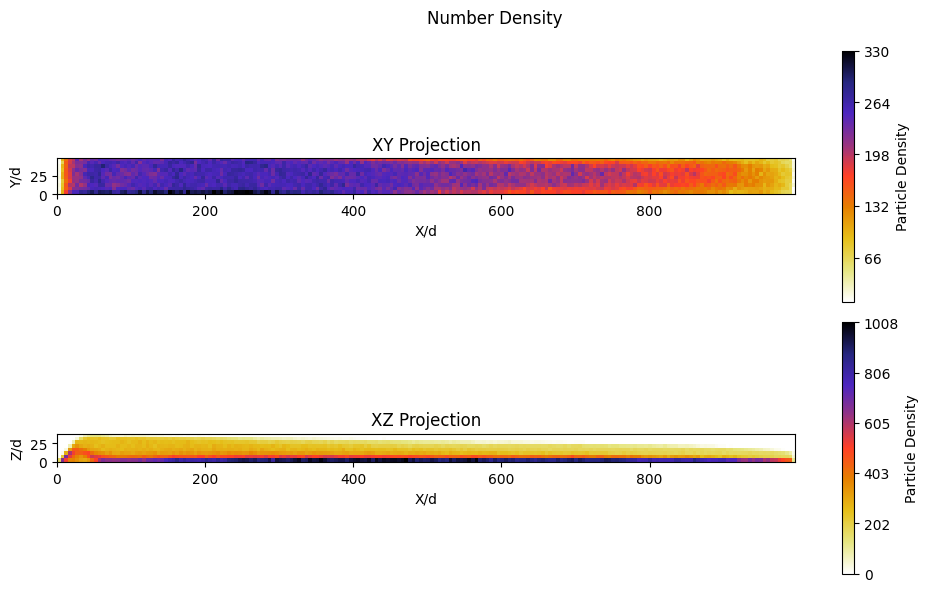

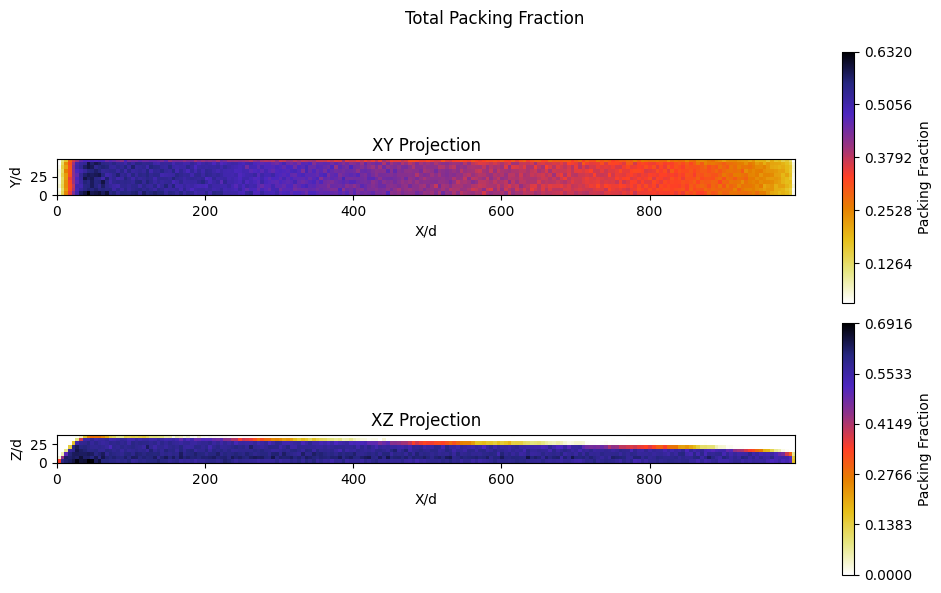

In [99]:
num_den_pf(df, grid_size = grid_size)

In [100]:
def conc(df, grid_size = grid_size):
    df_1 = df[df['Dia (m)'] == 1]
    df_2 = df[df['Dia (m)'] == 2]

    pf_grid = np.zeros((x_bins, y_bins, z_bins))
    pf1_grid = np.zeros((x_bins, y_bins, z_bins))
    pf2_grid = np.zeros((x_bins, y_bins, z_bins))


    for _, particle in df.iterrows():

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        
        diameter = particle['Dia (m)']
        particle_volume = np.pi*(diameter**3)/6
        pf_grid[x_idx, y_idx, z_idx] +=particle_volume

        if diameter==1:
            pf1_grid[x_idx, y_idx, z_idx] +=particle_volume
        else:
            pf2_grid[x_idx, y_idx, z_idx] +=particle_volume

    grid_vol  = grid_size**3
    pf_grid = pf_grid/grid_vol
    pf1_grid = pf1_grid/grid_vol
    pf2_grid = pf2_grid/grid_vol

    conc1_grid = pf1_grid/pf_grid
    conc2_grid = pf2_grid/pf_grid

    conc1_grid = np.nan_to_num(conc1_grid, nan=0)
    conc2_grid = np.nan_to_num(conc2_grid, nan=0)

    # pf_grid = gaussian_filter(pf_grid, sigma=0.6)  
    # pf1_grid = gaussian_filter(pf1_grid, sigma=0.6)
    # pf2_grid = gaussian_filter(pf2_grid, sigma=0.6)
    # conc1_grid = gaussian_filter(conc1_grid, sigma=0.6)
    # conc2_grid = gaussian_filter(conc2_grid, sigma=0.6)

    return pf_grid, pf1_grid, pf2_grid, conc1_grid, conc2_grid
    
    


In [101]:
df

,Object id,Dia (m),x,y,z,Vx,Vy,Vz
0,192,2.0,571.501953,34.791700,3.722330,0.063559,0.006391,0.000332
1,195,2.0,870.850339,27.274010,9.368860,0.185549,0.006024,0.012508
2,243,2.0,45.842422,23.681743,1.712066,0.000076,-0.000046,0.000032
3,245,2.0,56.109970,36.810800,0.309953,-0.000212,0.000073,-0.000288
4,292,2.0,53.727277,40.134900,1.621902,-0.000076,-0.000105,0.000033
...,...,...,...,...,...,...,...,...
411371,956376,1.0,33.445736,26.429780,37.432750,0.049552,0.000000,-0.106264
411372,956424,2.0,36.673876,7.661300,36.248021,0.151031,-0.142296,-0.338921
411373,956448,1.0,44.095587,19.840650,37.513100,0.123859,-0.083866,-0.736667
411374,956471,1.0,41.344344,12.081200,36.044807,0.175359,0.057176,-0.102312


In [102]:

pf_grid, pf1_grid, pf2_grid, conc1_grid, conc2_grid = conc(df)



/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/3075405564.py:30: RuntimeWarning: invalid value encountered in divide
  conc1_grid = pf1_grid/pf_grid
/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/3075405564.py:31: RuntimeWarning: invalid value encountered in divide
  conc2_grid = pf2_grid/pf_grid


In [103]:
def get_proj(matrix, threshold=0.05):
    mask = matrix>threshold
    xy_sum = np.sum(matrix*mask, axis=2)
    xz_sum = np.sum(matrix*mask, axis=1)

    xy_count = np.sum(mask, axis=2)
    xz_count = np.sum(mask, axis=1)
    
    xy = np.where(xy_count > 0, xy_sum / xy_count, 0)
    xz = np.where(xz_count > 0, xz_sum / xz_count, 0)

    return xy, xz

# def get_proj(matrix, threshold=0.2):
#     xy = matrix.mean(axis=2)
#     xz = matrix.mean(axis=1)

#     return xy, xz

/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2422201756.py:9: RuntimeWarning: invalid value encountered in divide
  xy = np.where(xy_count > 0, xy_sum / xy_count, 0)
/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2422201756.py:10: RuntimeWarning: invalid value encountered in divide
  xz = np.where(xz_count > 0, xz_sum / xz_count, 0)


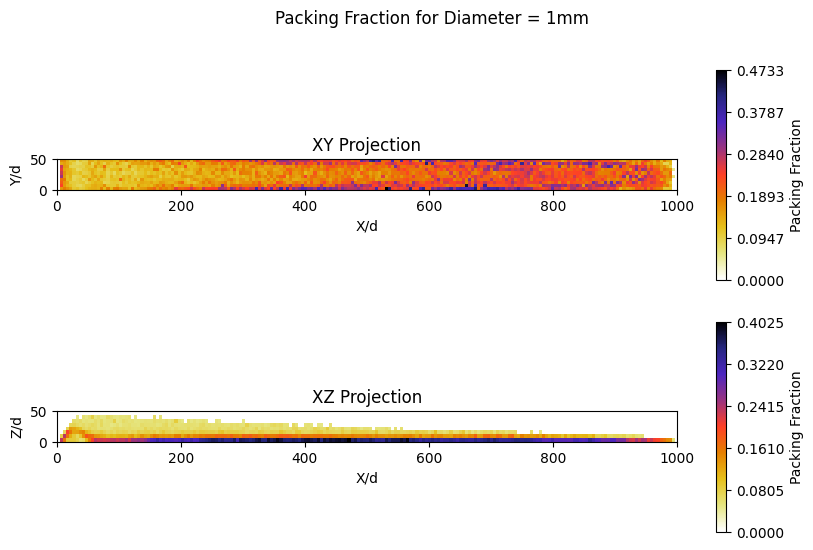

In [104]:
pf1_xy, pf1_xz  = get_proj(pf1_grid)
plt.figure(figsize=(10, 6))
plt.suptitle('Packing Fraction for Diameter = 1mm')

# XY Projection
plt.subplot(2, 1, 1)
plt.imshow(pf1_xy.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Packing Fraction', ticks=np.linspace(0, pf1_xy.max(), 6))  # Add more ticks
plt.title('XY Projection')
plt.xlabel('X/d')
plt.ylabel('Y/d')
plt.xlim(0,1000)
plt.ylim(0,50)

plt.subplot(2, 1, 2)
plt.imshow(pf1_xz.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Packing Fraction', ticks=np.linspace(0, pf1_xz.max(), 6))  # Add more ticks
plt.title('XZ Projection')
plt.xlabel('X/d')
plt.ylabel('Z/d')
plt.ylim(0,50)
plt.xlim(0,1000)
plt.show()

/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2422201756.py:10: RuntimeWarning: invalid value encountered in divide
  xz = np.where(xz_count > 0, xz_sum / xz_count, 0)


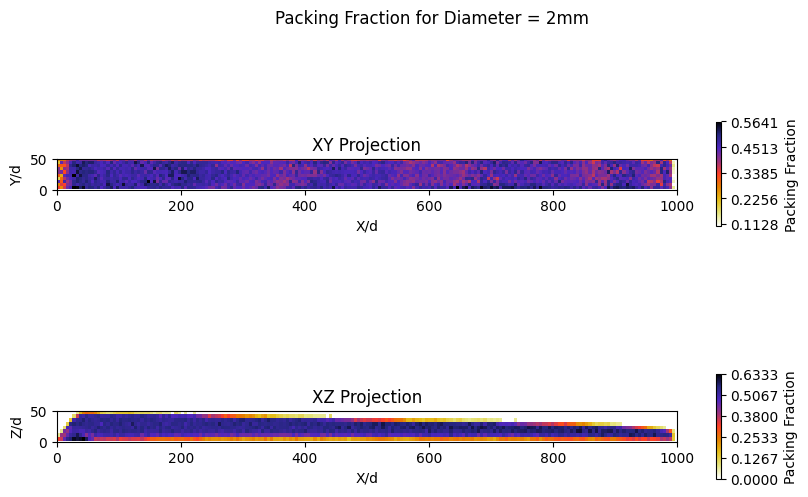

In [105]:
pf2_xy, pf2_xz  = get_proj(pf2_grid)
plt.figure(figsize=(10, 6))
plt.suptitle('Packing Fraction for Diameter = 2mm')

# XY Projection
plt.subplot(2, 1, 1)
plt.imshow(pf2_xy.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Packing Fraction', ticks=np.linspace(0, pf2_xy.max(), 6), shrink=0.5)  # Add more ticks
plt.title('XY Projection')
plt.xlabel('X/d')
plt.ylabel('Y/d')
plt.ylim(0,50)
plt.xlim(0,1000)

plt.subplot(2, 1, 2)
plt.imshow(pf2_xz.T, cmap='CMRmap_r', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Packing Fraction', ticks=np.linspace(0, pf2_xz.max(), 6), shrink=0.5)  # Add more ticks
plt.title('XZ Projection')
plt.xlabel('X/d')
plt.ylabel('Z/d')
plt.ylim(0,50)
plt.xlim(0,1000)

plt.show()

## Concentration Profile

In [106]:
xy_conc2, xz_conc2 = get_proj(conc2_grid)
xy_conc1, xz_conc1 = get_proj(conc1_grid)
# xy_conc1, xz_conc1 = 1-xy_conc2, 1-xz_conc2

/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2422201756.py:10: RuntimeWarning: invalid value encountered in divide
  xz = np.where(xz_count > 0, xz_sum / xz_count, 0)
/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2422201756.py:9: RuntimeWarning: invalid value encountered in divide
  xy = np.where(xy_count > 0, xy_sum / xy_count, 0)


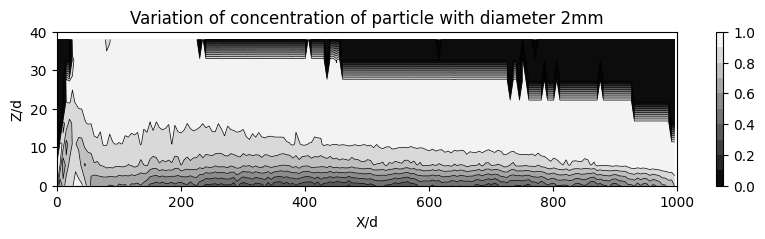

In [107]:
plt.figure(figsize=(10, 2))
contourf = plt.contourf(
    xz_conc2.T, levels=10, cmap="gray", vmin=0, vmax=1, extent=[x_min, x_max, z_min, z_max]
)

# Add contour lines (visible edges)
contour = plt.contour(
    xz_conc2.T, levels=10, colors="black", linewidths=0.5, extent=[x_min, x_max, z_min, z_max]
)

# Add a colorbar
cbar = plt.colorbar(contourf)

plt.xlabel('X/d')
plt.ylabel('Z/d')
plt.title('Variation of concentration of particle with diameter 2mm')
plt.ylim(0,40)
plt.xlim(0,1000)
plt.show()

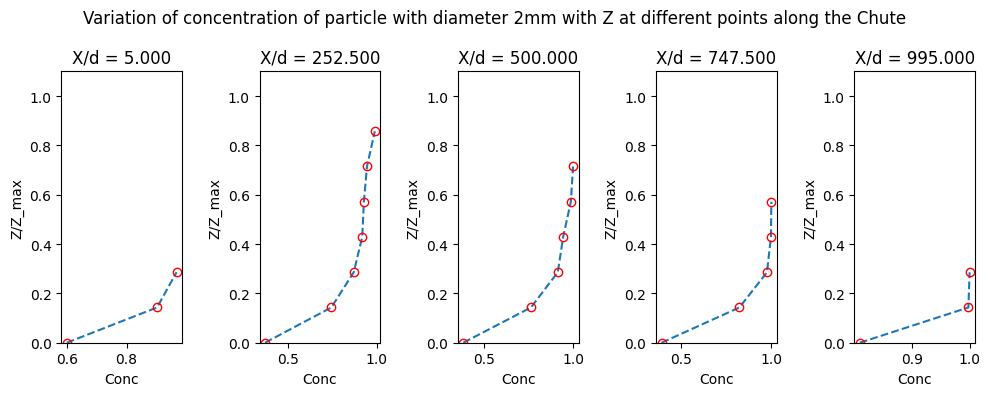

In [108]:
# variation of conc with Z

x_to_plot = np.linspace(1,xz_conc2.shape[0]-1, 5)
x_coord_to_plot = x_min+(grid_size*x_to_plot)

plt.figure(figsize=(10,4))

for i,bins in enumerate(x_to_plot):
    plt.subplot(1,5,i+1)
    conc = xz_conc2[int(bins),:].tolist()
    
    z_val = z_min + (grid_size*np.linspace(0,xz_conc2.shape[1], len(conc)))
    while conc[-1] == 0:
        conc.pop()
    z_val = z_val[:len(conc)]
    plt.plot(conc, z_val/40, 'o--', markerfacecolor='none', markeredgecolor='red')
    plt.title(f'X/d = {x_coord_to_plot[i]:0.3f}')
    plt.xlabel('Conc')
    plt.ylabel('Z/Z_max')
    # plt.xlim(0,1)
    plt.ylim(0,1.1)

plt.suptitle('Variation of concentration of particle with diameter 2mm with Z at different points along the Chute', x=0.5)
plt.tight_layout()
plt.show()

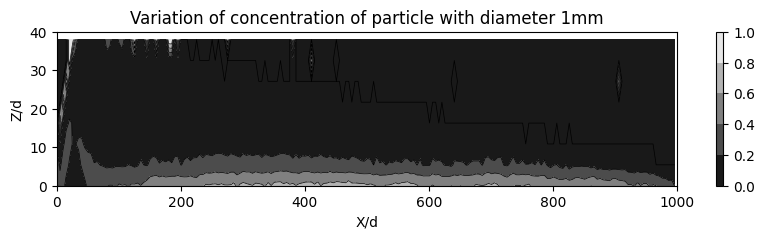

In [109]:
plt.figure(figsize=(10, 2))
contourf = plt.contourf(
    xz_conc1.T, levels=5, cmap="gray", vmin=0, vmax=1, extent=[x_min, x_max, z_min, z_max]
)

# Add contour lines (visible edges)
contour = plt.contour(
    xz_conc1.T, levels=5, colors="black", linewidths=0.5, extent=[x_min, x_max, z_min, z_max]
)

# Add a colorbar
cbar = plt.colorbar(contourf)

plt.xlabel('X/d')
plt.ylabel('Z/d')
plt.title('Variation of concentration of particle with diameter 1mm')
plt.ylim(0,40)
plt.xlim(0,1000)
plt.show()

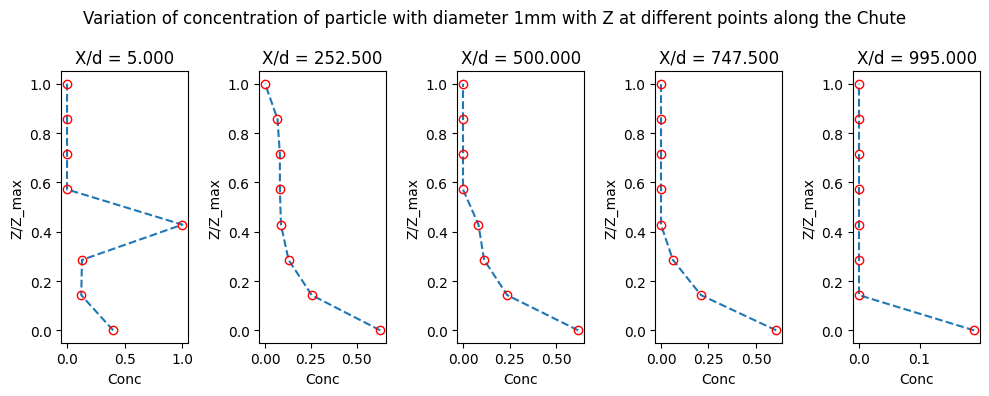

In [110]:
# variation of conc with Z

x_to_plot = np.linspace(1,xz_conc1.shape[0]-1, 5)
x_coord_to_plot = x_min+(grid_size*x_to_plot)

plt.figure(figsize=(10,4))

for i,bins in enumerate(x_to_plot):
    plt.subplot(1,5,i+1)
    conc = xz_conc1[int(bins),:].tolist()
    
    z_val = z_min + (grid_size*np.linspace(0,xz_conc1.shape[1], len(conc)))
    # count = 0
    # print(conc)
    # while conc[-1] == 1:
    #     conc.pop()
    #     count+=1
    # z_val = z_val[:len(conc)]
    plt.plot(conc, z_val/z_val.max(), 'o--', markerfacecolor='none', markeredgecolor='red')
    plt.title(f'X/d = {x_coord_to_plot[i]:0.3f}')
    plt.xlabel('Conc')
    plt.ylabel('Z/Z_max')
    # plt.xlim(0,1)
    # plt.ylim(-0.1,50)

plt.suptitle('Variation of concentration of particle with diameter 1mm with Z at different points along the Chute')
plt.tight_layout()
plt.show()

## Velocity Variation

In [111]:
def get_vel(df, grid_size = grid_size):
    Vx_grid = np.zeros((x_bins, y_bins, z_bins))
    Vy_grid = np.zeros((x_bins, y_bins, z_bins))
    Vz_grid = np.zeros((x_bins, y_bins, z_bins))

    cx_grid = np.zeros((x_bins, y_bins, z_bins))
    cy_grid = np.zeros((x_bins, y_bins, z_bins))
    cz_grid = np.zeros((x_bins, y_bins, z_bins))
    


    for _, particle in df.iterrows():

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        
        vx = particle['Vx']
        vy = particle['Vy']
        vz = particle['Vz']

        Vx_grid[x_idx, y_idx, z_idx] +=vx
        Vy_grid[x_idx, y_idx, z_idx] +=vy
        Vz_grid[x_idx, y_idx, z_idx] +=vz

        cx_grid[x_idx, y_idx, z_idx] +=1
        cy_grid[x_idx, y_idx, z_idx] +=1
        cz_grid[x_idx, y_idx, z_idx] +=1

    Vx_grid = Vx_grid/cx_grid
    Vy_grid = Vy_grid/cy_grid
    Vz_grid = Vz_grid/cz_grid

    Vx_grid = np.nan_to_num(Vx_grid, nan=0)
    Vy_grid = np.nan_to_num(Vy_grid, nan=0)
    Vz_grid = np.nan_to_num(Vz_grid, nan=0)

    return Vx_grid, Vy_grid, Vz_grid
    
    
    


In [112]:
Vx_grid, Vy_grid, Vz_grid = get_vel(df)

/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2954296426.py:30: RuntimeWarning: invalid value encountered in divide
  Vx_grid = Vx_grid/cx_grid
/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2954296426.py:31: RuntimeWarning: invalid value encountered in divide
  Vy_grid = Vy_grid/cy_grid
/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/2954296426.py:32: RuntimeWarning: invalid value encountered in divide
  Vz_grid = Vz_grid/cz_grid


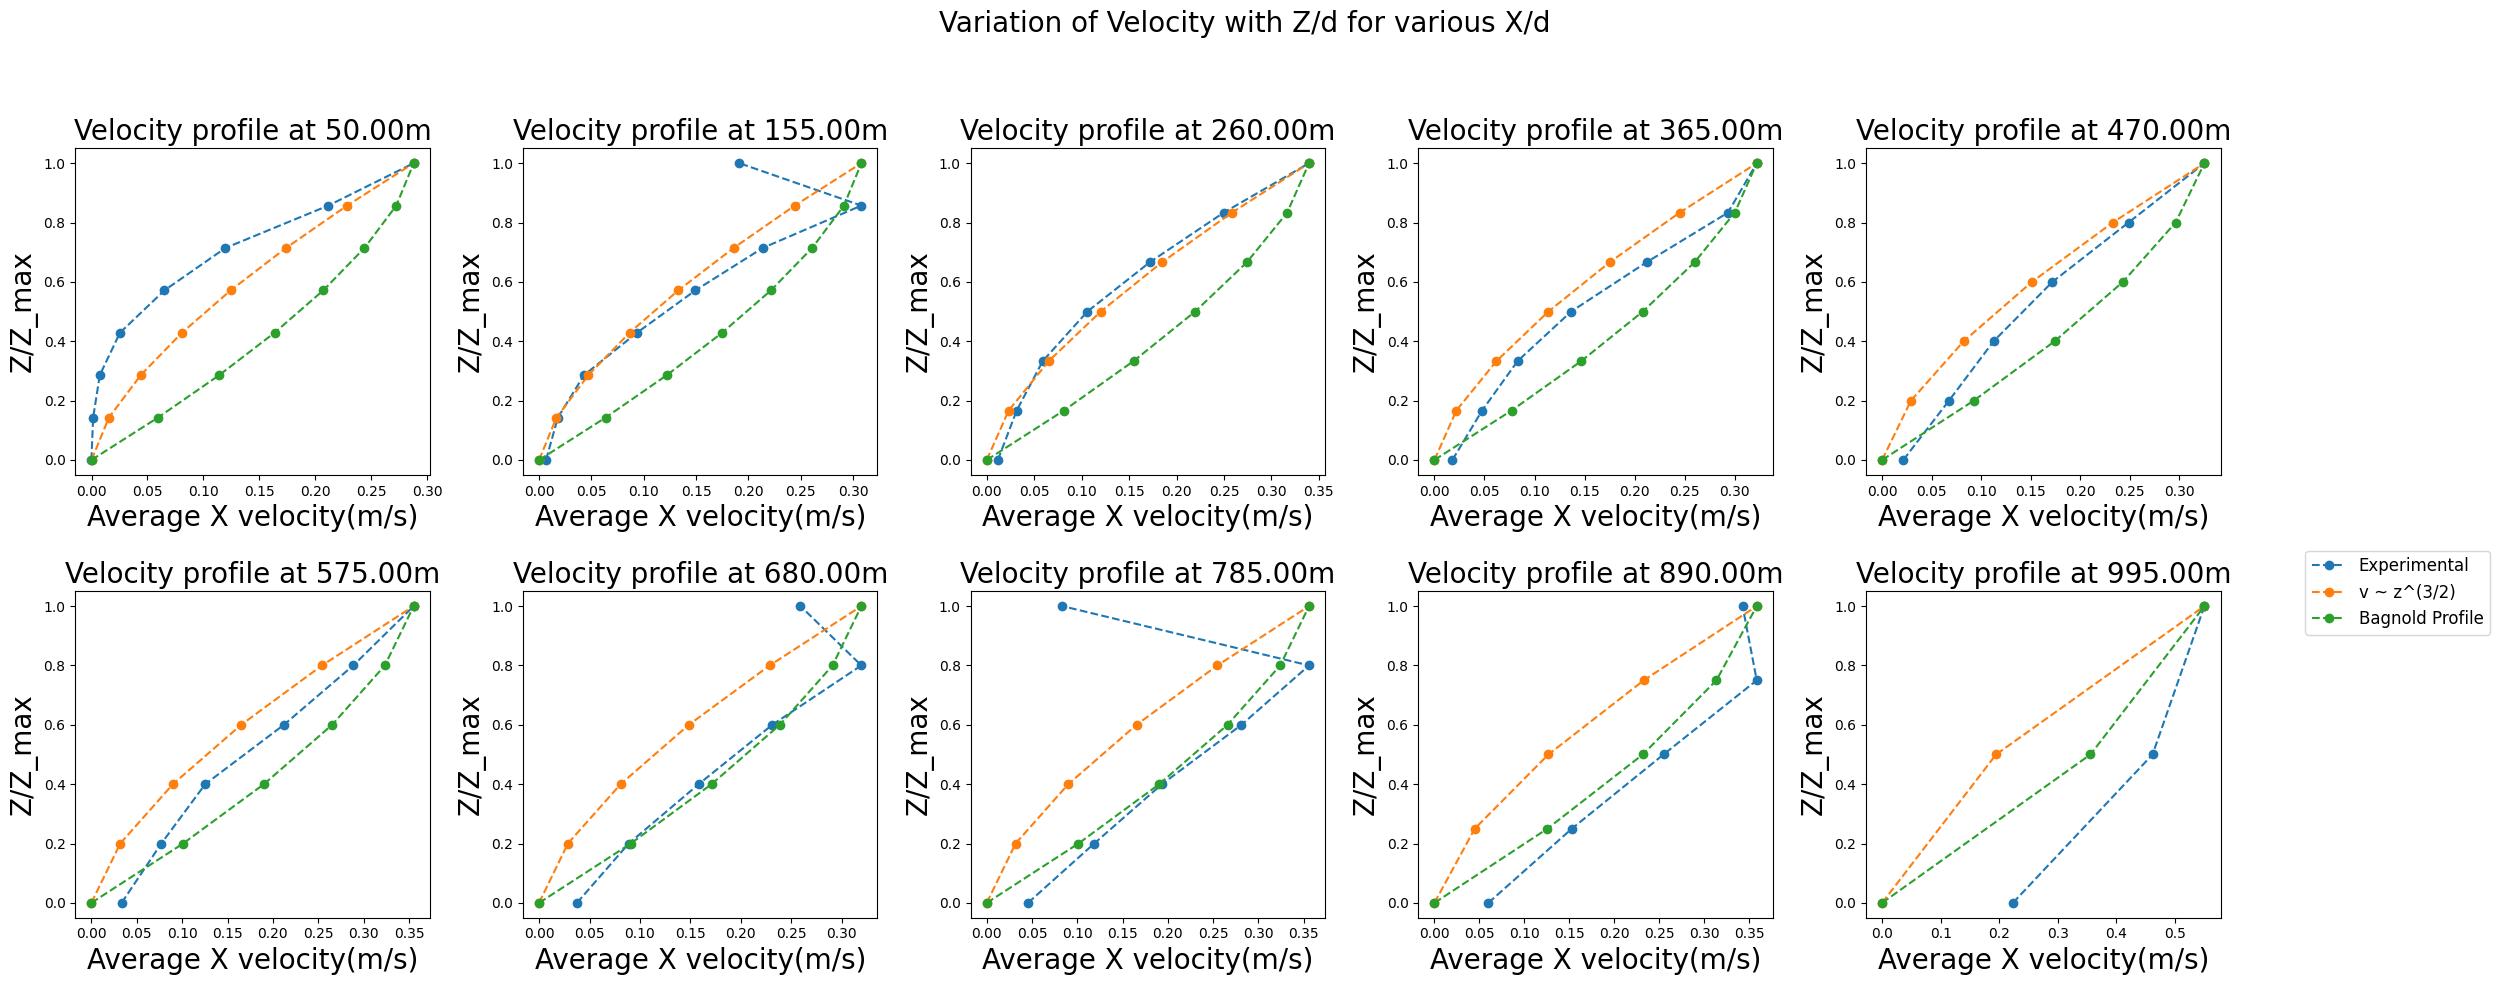

In [113]:
x_to_plot = np.linspace(10,xz_conc1.shape[0]-1, 10)
x_coord_to_plot = x_min+(grid_size*x_to_plot)
plt.figure(figsize=(25,10))

for i,bins in enumerate(x_to_plot):
    plt.subplot(2,5,i+1)
    Vx_profile = ((Vx_grid[int(bins),:,:]).mean(axis=0))
    z_val = z_min+grid_size*np.linspace(0,z_bins, Vx_profile.shape[0])
    Vx_profile = Vx_profile.tolist()
    count=0
    while Vx_profile[-1]==0:
        Vx_profile.pop()
        count+=1
    if count>=1:
        z_val = z_val[:-count]
    # print(Vx_profile)
    v_theo_1 = (1-((1-(z_val/z_val.max()))**(1.5)))*max(Vx_profile)
    v_theo_2 = max(Vx_profile)*((z_val/z_val.max())**1.5)
    plt.title(f'Velocity profile at {x_min + grid_size*bins:0.2f}m', fontsize=20)
    plt.xlabel('Average X velocity(m/s)', fontsize=20)
    plt.ylabel('Z/Z_max', fontsize=20)
    plt.plot(Vx_profile, z_val/z_val.max(), 'o--', label='Experimental')
    plt.plot(v_theo_2, z_val/z_val.max(), 'o--', label='v ~ z^(3/2)')
    plt.plot(v_theo_1, z_val/z_val.max(), 'o--', label = 'Bagnold Profile')

plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.15), ncol=1, fontsize=12)  # Add legend outside subplots
plt.suptitle('Variation of Velocity with Z/d for various X/d', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust layout to make space for the legend
plt.savefig
plt.show()
    





# Vx_profile = ((Vx_grid[120,:,:]).mean(axis=0))
# z_val = z_min+grid_size*np.linspace(0,z_bins, Vx_profile.shape[0])
# Vx_profile = Vx_profile.tolist()
# count=0
# while Vx_profile[-1]==0:
#     Vx_profile.pop()
#     count+=1

# z_val = z_val[:-count]

# v_theo = ((z_val/z_val.max())**(1.5))*max(Vx_profile)

# plt.title('Velocity profile at a FD region')
# plt.xlabel('Average X velocity(m/s)')
# plt.ylabel('Z/D')
# plt.plot(Vx_profile, z_val, 'o--', label='Experimental')
# plt.plot(v_theo, z_val, 'o--', label='Theoretical ~ z^(3/2)')
# plt.legend()

# plt.show()

/var/folders/dj/yrhtzcz16pq9vdl6yrcdlbkc0000gn/T/ipykernel_26320/3264284768.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(v_theo_2, z_val/z_val.max(), 'k--',color='black', label='Bagnold Profile' )


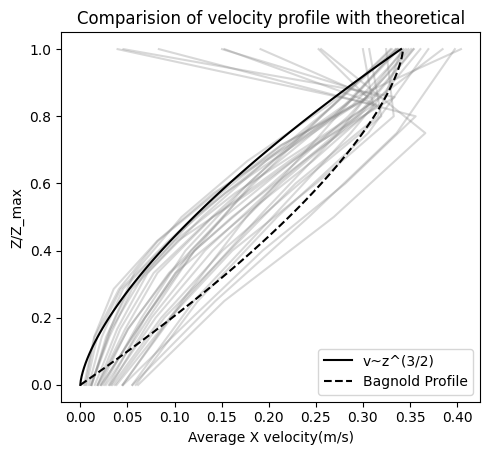

In [114]:
x_to_plot = np.linspace(20,xz_conc1.shape[0]-20, 30)
x_coord_to_plot = x_min+(grid_size*x_to_plot)
plt.figure(figsize=(5,5))
V_mean = []
max_z = []

for i,bins in enumerate(x_to_plot):
    # plt.subplot(2,5,i+1)
    Vx_profile = ((Vx_grid[int(bins),:,:]).mean(axis=0))
    z_val = z_min+grid_size*np.linspace(0,z_bins, Vx_profile.shape[0])
    Vx_profile = Vx_profile.tolist()
    count=0
    while Vx_profile[-1]==0:
        Vx_profile.pop()
        count+=1
    if count>=1:
        z_val = z_val[:-count]
    # print(Vx_profile)
    v_theo = ((z_val/z_val.max())**(1.5))*max(Vx_profile)
    # plt.title(f'Velocity profile at {x_min + grid_size*bins:0.2f}m', fontsize=20)
    plt.xlabel('Average X velocity(m/s)')
    plt.ylabel('Z/Z_max')
    plt.plot(Vx_profile, z_val/z_val.max(), alpha=0.3, color='gray')
    V_mean.append(max(Vx_profile))
    # if z_val.max()>max_z:
    max_z.append(z_val.max())


    

Vx_mean = np.array(V_mean).mean()
max_z_max = np.array(max_z).mean()
z_val = z_min+grid_size*np.linspace(0,z_bins, 100)
z_val = z_val[z_val<max_z_max]
v_theo = Vx_mean*(z_val/max_z_max)**(1.5)
v_theo_2 = Vx_mean*(1-((1-(z_val/z_val.max()))**(1.5)))


plt.plot(v_theo, z_val/z_val.max(),color='black', label = 'v~z^(3/2)')
plt.plot(v_theo_2, z_val/z_val.max(), 'k--',color='black', label='Bagnold Profile' )
plt.legend()


# plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.15), ncol=1, fontsize=12)  # Add legend outside subplots
# plt.suptitle('Variation of Velocity with Z/d for various X/d', fontsize=20)
plt.title('Comparision of velocity profile with theoretical')
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust layout to make space for the legend
plt.show()
    





# Vx_profile = ((Vx_grid[120,:,:]).mean(axis=0))
# z_val = z_min+grid_size*np.linspace(0,z_bins, Vx_profile.shape[0])
# Vx_profile = Vx_profile.tolist()
# count=0
# while Vx_profile[-1]==0:
#     Vx_profile.pop()
#     count+=1

# z_val = z_val[:-count]

# v_theo = ((z_val/z_val.max())**(1.5))*max(Vx_profile)

# plt.title('Velocity profile at a FD region')
# plt.xlabel('Average X velocity(m/s)')
# plt.ylabel('Z/D')
# plt.plot(Vx_profile, z_val, 'o--', label='Experimental')
# plt.plot(v_theo, z_val, 'o--', label='Theoretical ~ z^(3/2)')
# plt.legend()

# plt.show()

## Y_COM with X

In [115]:
density_grid = np.zeros((x_bins, y_bins, z_bins))
pf_grid = np.zeros((x_bins, y_bins, z_bins))

for _, particle in df.iterrows():
    if particle['Dia (m)']==1:

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        
    
        density_grid[x_idx, y_idx, z_idx] += 1

y_com_list = []
x_coords = []

for x_idx in range(density_grid.shape[0]):
    # Extract the slice of the grid for this x_idx
    particle_slice = density_grid[x_idx, :, :]
    
    # Compute y_coord values
    y_indices = np.arange(density_grid.shape[1])
    y_coords = y_min + y_indices * grid_size
    
    # Compute the numerator and denominator for y_com
    weights = np.sum(particle_slice, axis=1)  # Sum over z-axis
    total_particles = np.sum(weights)
    
    if total_particles > 0:  # Avoid division by zero
        y_com = np.sum(weights * y_coords) / total_particles
    else:
        y_com = np.nan  # No particles in this x-slice
    
    y_com_list.append(y_com)
    x_coords.append(x_min + x_idx * grid_size)
y_com_list_1 = y_com_list
x_coords_1 = x_coords



In [116]:
density_grid = np.zeros((x_bins, y_bins, z_bins))
pf_grid = np.zeros((x_bins, y_bins, z_bins))

for _, particle in df.iterrows():
    if particle['Dia (m)']==2:

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        
    
        density_grid[x_idx, y_idx, z_idx] += 1


y_com_list = []
x_coords = []

for x_idx in range(density_grid.shape[0]):
    # Extract the slice of the grid for this x_idx
    particle_slice = density_grid[x_idx, :, :]
    
    # Compute y_coord values
    y_indices = np.arange(density_grid.shape[1])
    y_coords = y_min + y_indices * grid_size
    
    # Compute the numerator and denominator for y_com
    weights = np.sum(particle_slice, axis=1)  # Sum over z-axis
    total_particles = np.sum(weights)
    
    if total_particles > 0:  # Avoid division by zero
        y_com = np.sum(weights * y_coords) / total_particles
    else:
        y_com = np.nan  # No particles in this x-slice
    
    y_com_list.append(y_com)
    x_coords.append(x_min + x_idx * grid_size)
y_com_list_2 = y_com_list
x_coords_2 = x_coords

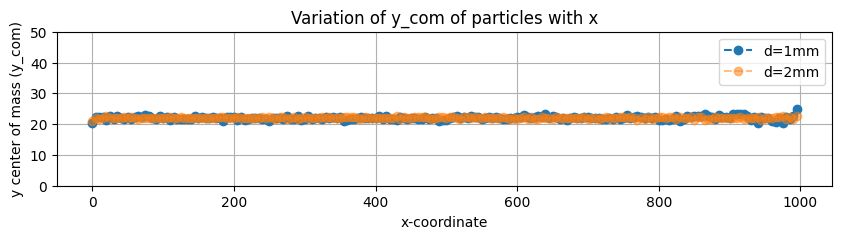

In [117]:
plt.figure(figsize=(10, 2))
plt.plot(x_coords_1, y_com_list_1,'o--', label='d=1mm')
plt.plot(x_coords_2, y_com_list_2,'o--', label='d=2mm', alpha=0.5)
plt.xlabel('x-coordinate')
plt.ylabel('y center of mass (y_com)')
plt.title('Variation of y_com of particles with x')
plt.grid()
plt.ylim(0,50)
plt.legend()
plt.savefig('Y_com.png')
plt.show()

## Z_com with X

In [118]:
density_grid = np.zeros((x_bins, y_bins, z_bins))
pf_grid = np.zeros((x_bins, y_bins, z_bins))

for _, particle in df.iterrows():
    if particle['Dia (m)']==1:

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        
    
        density_grid[x_idx, y_idx, z_idx] += 1

z_com_list = []
x_coords = []

for x_idx in range(density_grid.shape[0]):
    # Extract the slice of the grid for this x_idx
    particle_slice = density_grid[x_idx, :, :]
    
    # Compute y_coord values
    z_indices = np.arange(density_grid.shape[2])
    z_coords = z_min + z_indices * grid_size
    
    # Compute the numerator and denominator for z_com
    weights = np.sum(particle_slice, axis=0)  # Sum over y-axis
    total_particles = np.sum(weights)
    
    if total_particles > 0:  # Avoid division by zero
        z_com = np.sum(weights * z_coords) / total_particles
    else:
        y_com = np.nan  # No particles in this x-slice
    
    z_com_list.append(z_com)
    x_coords.append(x_min + x_idx * grid_size)
z_com_list_1 = z_com_list
x_coords_1 = x_coords



In [119]:
density_grid = np.zeros((x_bins, y_bins, z_bins))
pf_grid = np.zeros((x_bins, y_bins, z_bins))

for _, particle in df.iterrows():
    if particle['Dia (m)']==2:

        x_idx = int((particle['x'] - x_min) / grid_size)
        y_idx = int((particle['y'] - y_min) / grid_size)
        z_idx = int((particle['z'] - z_min) / grid_size)
        
    
        density_grid[x_idx, y_idx, z_idx] += 1

z_com_list = []
x_coords = []

for x_idx in range(density_grid.shape[0]):
    # Extract the slice of the grid for this x_idx
    particle_slice = density_grid[x_idx, :, :]
    
    # Compute y_coord values
    z_indices = np.arange(density_grid.shape[2])
    z_coords = z_min + z_indices * grid_size
    
    # Compute the numerator and denominator for z_com
    weights = np.sum(particle_slice, axis=0)  # Sum over y-axis
    total_particles = np.sum(weights)
    
    if total_particles > 0:  # Avoid division by zero
        z_com = np.sum(weights * z_coords) / total_particles
    else:
        y_com = np.nan  # No particles in this x-slice
    
    z_com_list.append(z_com)
    x_coords.append(x_min + x_idx * grid_size)
z_com_list_2 = z_com_list
x_coords_2 = x_coords



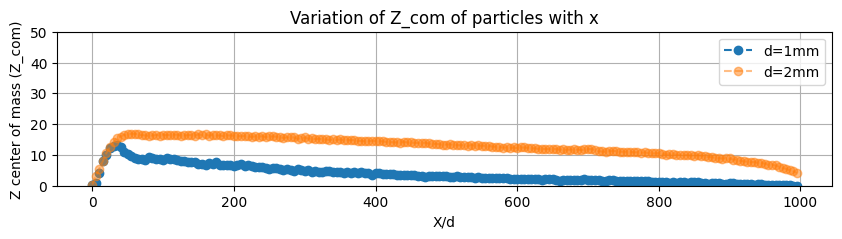

In [120]:
plt.figure(figsize=(10, 2))
plt.plot(x_coords_1, z_com_list_1,'o--', label='d=1mm')
plt.plot(x_coords_2, z_com_list_2,'o--', label='d=2mm', alpha=0.5)
plt.xlabel('X/d')
plt.ylabel('Z center of mass (Z_com)')
plt.title('Variation of Z_com of particles with x')
plt.grid()
plt.ylim(0,50)
plt.legend()
plt.savefig('Z_com.png')
plt.show()

## Variation of Concentration of 2mm particles with y for different x

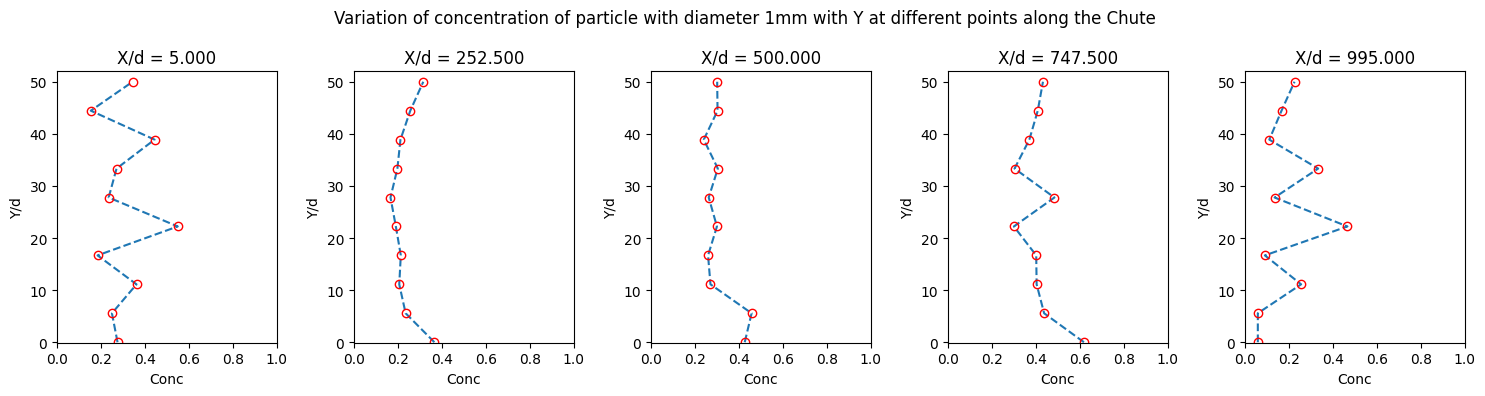

In [121]:
# variation of conc with y

x_to_plot = np.linspace(1,xy_conc1.shape[0]-1, 5)
x_coord_to_plot = x_min+(grid_size*x_to_plot)

plt.figure(figsize=(15,4))

for i,bins in enumerate(x_to_plot):
    plt.subplot(1,5,i+1)
    conc = xy_conc1[int(bins),:].tolist()
    
    y_val = y_min + (grid_size*np.linspace(0,xy_conc1.shape[1], len(conc)))
    # count = 0
    # print(conc)
    # while conc[-1] == 1:
    #     conc.pop()
    #     count+=1
    y_val = y_val[:len(conc)]
    plt.plot(conc, y_val, 'o--', markerfacecolor='none', markeredgecolor='red')
    plt.title(f'X/d = {x_coord_to_plot[i]:0.3f}')
    plt.xlabel('Conc')
    plt.ylabel('Y/d')
    plt.xlim(0,1)
    plt.ylim(-0.1,52)

plt.suptitle('Variation of concentration of particle with diameter 1mm with Y at different points along the Chute')
plt.tight_layout()
plt.show()

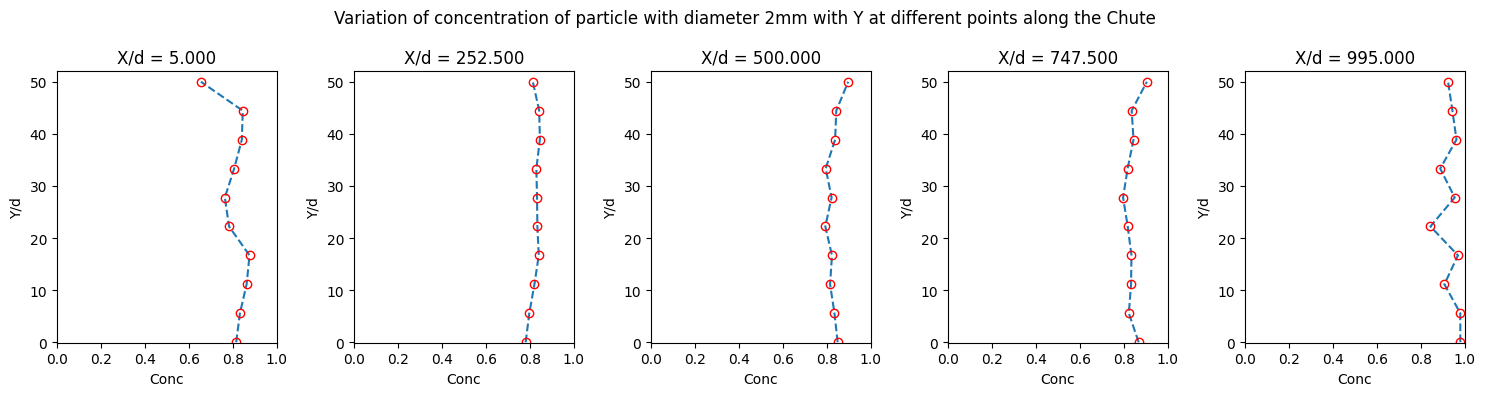

In [122]:
# variation of conc with y

x_to_plot = np.linspace(1,xy_conc2.shape[0]-1, 5)
x_coord_to_plot = x_min+(grid_size*x_to_plot)

plt.figure(figsize=(15,4))

for i,bins in enumerate(x_to_plot):
    plt.subplot(1,5,i+1)
    conc = xy_conc2[int(bins),:].tolist()
    
    y_val = y_min + (grid_size*np.linspace(0,xy_conc2.shape[1], len(conc)))
    # count = 0
    # print(conc)
    # while conc[-1] == 1:
    #     conc.pop()
    #     count+=1
    y_val = y_val[:len(conc)]
    plt.plot(conc, y_val, 'o--', markerfacecolor='none', markeredgecolor='red')
    plt.title(f'X/d = {x_coord_to_plot[i]:0.3f}')
    plt.xlabel('Conc')
    plt.ylabel('Y/d')
    plt.xlim(0,1)
    plt.ylim(-0.1,52)

plt.suptitle('Variation of concentration of particle with diameter 2mm with Y at different points along the Chute')
plt.tight_layout()
plt.show()